<a href="https://colab.research.google.com/github/RaghuMadhavTiwari/PySpark-practice/blob/main/IntroToPySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
# installation
!pip install pyspark

# testing
from pyspark.sql import SparkSession


spark = SparkSession \
.builder \
.appName("Python Spark create RDD example") \
.config("spark.some.config.option", "some-value") \
.getOrCreate()
df = spark.sparkContext\
.parallelize([(1, 2, 3, 'a b c'),
(4, 5, 6, 'd e f'),
(7, 8, 9, 'g h i')])\
.toDF(['col1', 'col2', 'col3','col4'])
df.show()

# creating a spark context
from pyspark import SparkContext
sc = SparkContext("local", "Simple App")


from pyspark.sql import SparkSession

#Create a Spark Session
spark = SparkSession \
    .builder \
    .master("local[2]") \
    .appName("V2 Maestros") \
    .config("spark.executor.memory", "1g") \
    .config("spark.cores.max","2") \
    .config("spark.sql.warehouse.dir", "file:///c:/temp/spark-warehouse")\
    .getOrCreate()
'''

'\n# installation\n!pip install pyspark\n\n# testing\nfrom pyspark.sql import SparkSession\n\n\nspark = SparkSession .builder .appName("Python Spark create RDD example") .config("spark.some.config.option", "some-value") .getOrCreate()\ndf = spark.sparkContext.parallelize([(1, 2, 3, \'a b c\'),\n(4, 5, 6, \'d e f\'),\n(7, 8, 9, \'g h i\')]).toDF([\'col1\', \'col2\', \'col3\',\'col4\'])\ndf.show()\n\n# creating a spark context\nfrom pyspark import SparkContext\nsc = SparkContext("local", "Simple App")\n\n\nfrom pyspark.sql import SparkSession\n\n#Create a Spark Session\nspark = SparkSession     .builder     .master("local[2]")     .appName("V2 Maestros")     .config("spark.executor.memory", "1g")     .config("spark.cores.max","2")     .config("spark.sql.warehouse.dir", "file:///c:/temp/spark-warehouse")    .getOrCreate()\n'

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
!ls

sample1.txt  Sample-Spreadsheet-100-rows.csv  spark-3.1.1-bin-hadoop3.2.tgz
sample_data  spark-3.1.1-bin-hadoop3.2


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
from pyspark.sql.types import StructType
sc = spark.sparkContext

In [ ]:
rdd = sc.parallelize([1,2,3,4,5])
rdd

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274

In [ ]:
filename = '/content/sample1.txt'
rdd = sc.textFile(filename)

In [ ]:
# Print the version of SparkContext
print("The version of Spark Context in the PySpark shell is", sc.version)

# Print the Python version of SparkContext
print("The Python version of Spark Context in the PySpark shell is", sc.pythonVer)

# Print the master of SparkContext
print("The master of Spark Context in the PySpark shell is", sc.master)

The version of Spark Context in the PySpark shell is 3.1.1
The Python version of Spark Context in the PySpark shell is 3.7
The master of Spark Context in the PySpark shell is local[*]


In [ ]:
# Create a Python list of numbers from 1 to 100 
numb = range(1, 101)

# Load the list into PySpark  
spark_data = sc.parallelize(numb)

In [ ]:
# Load a local file into PySpark shell

file_path ='/content/sample1.txt'
lines = sc.textFile(file_path)

In [ ]:
# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


In [ ]:
# Print the file_path
print("The file_path is", file_path)

# Create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file_path is /content/sample1.txt
The file type of fileRDD is <class 'pyspark.rdd.RDD'>


In [ ]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 5


In [ ]:
#  Create map() transformation to cube numbers
numbRDD = sc.parallelize(range(1,11))
cubedRDD = numbRDD.map(lambda x: x**3)

# Collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
	print(numb)

1
8
27
64
125
216
343
512
729
1000


In [ ]:
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'est' in line)

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Spark is", fileRDD_filter.count())

# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4): 
  print(line)

The total number of lines with the keyword Spark is 2
Utilitatis causa amicitia est quaesita.
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Collatio igitur ista te nihil iuvat. Honesta oratio, Socratica, Platonis etiam. Primum in nostrane potestate est, quid meminerimus? Duo Reges: constructio interrete. Quid, si etiam iucunda memoria est praeteritorum malorum? Si quidem, inquit, tollerem, sed relinquo. An nisi populari fama?


In [ ]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1,2),(3,4),(3,6),(4,5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x + y)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect(): 
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 1 has 2 Counts
Key 3 has 10 Counts


In [ ]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)

# Iterate over the result and retrieve all the elements of the RDD
for num in Rdd_Reduced_Sort.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


In [ ]:
# Count the unique keys
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items(): 
  print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts


In [ ]:
'''
# Create a baseRDD from the file path
baseRDD = sc.textFile(file_path)

# Split the lines of baseRDD into words
splitRDD = baseRDD.map(lambda x: x.split())

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

# Display the first 10 words and their frequencies from the input RDD
for word in resultRDD.take(10):
	print(word)

# Swap the keys and values from the input RDD
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

# Show the top 10 most frequent words and their frequencies from the sorted RDD
for word in resultRDD_swap_sort.take(10):
	print("{},{}". format(word[1], word[0]))

'''

'\n# Create a baseRDD from the file path\nbaseRDD = sc.textFile(file_path)\n\n# Split the lines of baseRDD into words\nsplitRDD = baseRDD.map(lambda x: x.split())\n\n# Count the total number of words\nprint("Total number of words in splitRDD:", splitRDD.count())\n\n# Convert the words in lower case and remove stop words from the stop_words curated list\nsplitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)\n\n# Create a tuple of the word and 1 \nsplitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))\n\n# Count of the number of occurences of each word\nresultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)\n\n# Display the first 10 words and their frequencies from the input RDD\nfor word in resultRDD.take(10):\n\tprint(word)\n\n# Swap the keys and values from the input RDD\nresultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))\n\n# Sort the keys in descending order\nresultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)\n\n# Show the to

In [ ]:
sample_list  = [('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]

# Create an RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
file_path = '/content/Sample-Spreadsheet-100-rows.csv'
# Create a DataFrame from file_path
people_df = spark.read.csv(file_path, header=False, inferSchema=True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
# Print the first 10 observations 
people_df.show(10)

# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}"\
      .format(len(people_df.columns), people_df.columns))

+---+--------------------+------------------+---+-------+------+-----+-------+--------------------+----+
|_c0|                 _c1|               _c2|_c3|    _c4|   _c5|  _c6|    _c7|                 _c8| _c9|
+---+--------------------+------------------+---+-------+------+-----+-------+--------------------+----+
|  1|Eldon Base for st...|Muhammed MacIntyre|  3|-213.25| 38.94| 35.0|Nunavut|Storage & Organiz...| 0.8|
|  2|"1.7 Cubic Foot C...|      Barry French|293| 457.81|208.16|68.02|Nunavut|          Appliances|0.58|
|  3|Cardinal Slant-D�...|      Barry French|293|  46.71|  8.69| 2.99|Nunavut|Binders and Binde...|0.39|
|  4|                R380|     Clay Rozendal|483|1198.97|195.99| 3.99|Nunavut|Telephones and Co...|0.58|
|  5|Holmes HEPA Air P...|    Carlos Soltero|515|  30.94| 21.78| 5.94|Nunavut|          Appliances| 0.5|
|  6|G.E. Longer-Life ...|    Carlos Soltero|515|   4.43|  6.64| 4.95|Nunavut|  Office Furnishings|0.37|
|  7|Angle-D Binders w...|      Carl Jackson|613| -54.0

In [ ]:
# Print the first 10 observations 
people_df.show(10)

# Count the number of rows 
print("There are {} rows in the people_df DataFrame."\
      .format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}"\
      .format(len(people_df.columns), people_df.columns))

+---+--------------------+------------------+---+-------+------+-----+-------+--------------------+----+
|_c0|                 _c1|               _c2|_c3|    _c4|   _c5|  _c6|    _c7|                 _c8| _c9|
+---+--------------------+------------------+---+-------+------+-----+-------+--------------------+----+
|  1|Eldon Base for st...|Muhammed MacIntyre|  3|-213.25| 38.94| 35.0|Nunavut|Storage & Organiz...| 0.8|
|  2|"1.7 Cubic Foot C...|      Barry French|293| 457.81|208.16|68.02|Nunavut|          Appliances|0.58|
|  3|Cardinal Slant-D�...|      Barry French|293|  46.71|  8.69| 2.99|Nunavut|Binders and Binde...|0.39|
|  4|                R380|     Clay Rozendal|483|1198.97|195.99| 3.99|Nunavut|Telephones and Co...|0.58|
|  5|Holmes HEPA Air P...|    Carlos Soltero|515|  30.94| 21.78| 5.94|Nunavut|          Appliances| 0.5|
|  6|G.E. Longer-Life ...|    Carlos Soltero|515|   4.43|  6.64| 4.95|Nunavut|  Office Furnishings|0.37|
|  7|Angle-D Binders w...|      Carl Jackson|613| -54.0

In [ ]:
# Select _c0,_c1,_c2 of birth columns
people_df_sub = people_df.select('_c0', "_c1", "_c2")

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates"\
      .format(people_df_sub.count(), people_df_sub_nodup.count()))

+---+--------------------+------------------+
|_c0|                 _c1|               _c2|
+---+--------------------+------------------+
|  1|Eldon Base for st...|Muhammed MacIntyre|
|  2|"1.7 Cubic Foot C...|      Barry French|
|  3|Cardinal Slant-D�...|      Barry French|
|  4|                R380|     Clay Rozendal|
|  5|Holmes HEPA Air P...|    Carlos Soltero|
|  6|G.E. Longer-Life ...|    Carlos Soltero|
|  7|Angle-D Binders w...|      Carl Jackson|
|  8|SAFCO Mobile Desk...|      Carl Jackson|
|  9|SAFCO Commercial ...|    Monica Federle|
| 10|           Xerox 198|   Dorothy Badders|
+---+--------------------+------------------+
only showing top 10 rows

There were 100 rows before removing duplicates, and 100 rows after removing duplicates


In [ ]:
# Filter people_df to select Nunavut 
people_df_Nunavut = people_df.filter(people_df._c7 == "Nunavut")

# Filter people_df to select Northwest Territories
people_df_nt = people_df.filter(people_df._c7 == "Northwest Territories")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame"\
      .format(people_df_Nunavut.count(), people_df_nt.count()))

There are 75 rows in the people_df_female DataFrame and 20 rows in the people_df_male DataFrame


In [ ]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT _c2 FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+------------------+
|               _c2|
+------------------+
|Muhammed MacIntyre|
|      Barry French|
|      Barry French|
|     Clay Rozendal|
|    Carlos Soltero|
|    Carlos Soltero|
|      Carl Jackson|
|      Carl Jackson|
|    Monica Federle|
|   Dorothy Badders|
+------------------+
only showing top 10 rows



In [ ]:
# Filter the people table to select female sex 
people_Nunavut_df = spark.sql('SELECT * FROM people WHERE _c7=="Nunavut"')

# Filter the people table DataFrame to select male sex
people_nt_df = spark.sql('SELECT * FROM people WHERE _c7=="Northwest Territories"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames"\
      .format(people_Nunavut_df.count(), people_nt_df.count()))

There are 75 rows in the people_female_df and 20 rows in the people_male_df DataFrames


The column names of names_df are ['Name', 'Age']


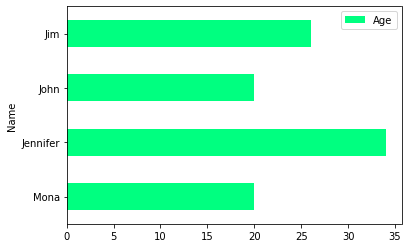

In [ ]:
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

import matplotlib.pyplot as plt

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

In [ ]:
# Load the Dataframe
fifa_df = people_df

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)

+---+--------------------+------------------+---+-------+------+-----+-------+--------------------+----+
|_c0|                 _c1|               _c2|_c3|    _c4|   _c5|  _c6|    _c7|                 _c8| _c9|
+---+--------------------+------------------+---+-------+------+-----+-------+--------------------+----+
|  1|Eldon Base for st...|Muhammed MacIntyre|  3|-213.25| 38.94| 35.0|Nunavut|Storage & Organiz...| 0.8|
|  2|"1.7 Cubic Foot C...|      Barry French|293| 457.81|208.16|68.02|Nunavut|          Appliances|0.58|
|  3|Cardinal Slant-D�...|      Barry French|293|  46.71|  8.69| 2.99|Nunavut|Binders and Binde...|0.39|
|  4|        

In [ ]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT _c5 FROM fifa_df_table WHERE _c8 == "Paper"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+------------------+
|summary|               _c5|
+-------+------------------+
|  count|                18|
|   mean| 13.80722222222222|
| stddev|12.777748952794994|
|    min|              3.98|
|    max|             48.91|
+-------+------------------+



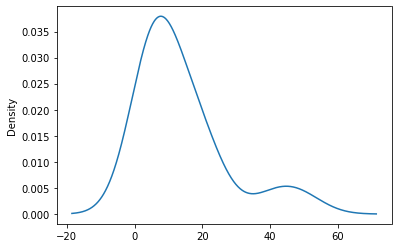

In [ ]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas["_c5"].plot(kind='density')
plt.show()

In [ ]:
# Import the library for ALS
from pyspark.mllib.recommendation import ALS

# Import the library for Logistic Regression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Import the library for Kmeans
from pyspark.mllib.clustering import KMeans

In [ ]:
'''
# Load the data into RDD
data = sc.textFile(file_path)

# Split the RDD 
ratings = data.map(lambda l: l.split(','))

# Transform the ratings RDD 
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# Split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

# Create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column 
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# Predict the model  
predictions = model.predictAll(testdata_no_rating)

# Return the first 2 rows of the RDD
predictions.take(2)

# Prepare ratings data
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# Prepare predictions data
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# Join the ratings data with predictions data
rates_and_preds = rates.join(preds)

# Calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

'''

'\n# Load the data into RDD\ndata = sc.textFile(file_path)\n\n# Split the RDD \nratings = data.map(lambda l: l.split(\',\'))\n\n# Transform the ratings RDD \nratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))\n\n# Split the data into training and test\ntraining_data, test_data = ratings_final.randomSplit([0.8, 0.2])\n\n# Create the ALS model on the training data\nmodel = ALS.train(training_data, rank=10, iterations=10)\n\n# Drop the ratings column \ntestdata_no_rating = test_data.map(lambda p: (p[0], p[1]))\n\n# Predict the model  \npredictions = model.predictAll(testdata_no_rating)\n\n# Return the first 2 rows of the RDD\npredictions.take(2)\n\n# Prepare ratings data\nrates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))\n\n# Prepare predictions data\npreds = predictions.map(lambda r: ((r[0], r[1]), r[2]))\n\n# Join the ratings data with predictions data\nrates_and_preds = rates.join(preds)\n\n# Calculate and print MSE\nMSE = rates_and_pre

In [ ]:
'''
# Load the datasets into RDDs
spam_rdd = sc.textFile(file_path_spam)
non_spam_rdd = sc.textFile(file_path_non_spam)

# Split the email messages into words
spam_words = spam_rdd.map(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.map(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

# Load the datasets into RDDs
spam_rdd = sc.textFile(file_path_spam)
non_spam_rdd = sc.textFile(file_path_non_spam)

# Split the email messages into words
spam_words = spam_rdd.flatMap(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.flatMap(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())


# Create a HashingTf instance with 200 features
tf = HashingTF(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.join(non_spam_samples)

# Split the data into training and testing
train_samples,test_samples = samples.randomSplit([0.8, 0.2])

# Train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# Create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# Combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# Check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())
print("Model accuracy : {:.2f}".format(accuracy))

'''

'\n# Load the datasets into RDDs\nspam_rdd = sc.textFile(file_path_spam)\nnon_spam_rdd = sc.textFile(file_path_non_spam)\n\n# Split the email messages into words\nspam_words = spam_rdd.map(lambda email: email.split(\' \'))\nnon_spam_words = non_spam_rdd.map(lambda email: email.split(\' \'))\n\n# Print the first element in the split RDD\nprint("The first element in spam_words is", spam_words.first())\nprint("The first element in non_spam_words is", non_spam_words.first())\n\n# Load the datasets into RDDs\nspam_rdd = sc.textFile(file_path_spam)\nnon_spam_rdd = sc.textFile(file_path_non_spam)\n\n# Split the email messages into words\nspam_words = spam_rdd.flatMap(lambda email: email.split(\' \'))\nnon_spam_words = non_spam_rdd.flatMap(lambda email: email.split(\' \'))\n\n# Print the first element in the split RDD\nprint("The first element in spam_words is", spam_words.first())\nprint("The first element in non_spam_words is", non_spam_words.first())\n\n\n# Create a HashingTf instance with 

In [ ]:
'''
# Load the dataset into an RDD
clusterRDD = sc.textFile(file_path)

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split("\t"))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

# Load the dataset into an RDD
clusterRDD = sc.textFile(file_path)

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split("\t"))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

# Train the model with clusters from 13 to 16 and compute WSSSE
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

# Train the model again with the best k
model = KMeans.train(rdd_split_int, k=15, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

# Convert rdd_split_int RDD into Spark DataFrame and then to Pandas DataFrame
rdd_split_int_df_pandas = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"]).toPandas()

# Convert cluster_centers to a pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

# Create an overlaid scatter plot of clusters and centroids
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="x")
plt.show()

'''